### Decision Tree

#### Introduction of Dataset
###### Suppose we have a dataset that contain patients data like their age, gender, blood pressure, cholesterol level, the amount of sodium-potassium in blood. Accounding to the patient data the doctor provide medicine to the patient. Here I have created a model the predict medicine for the new patient.  

#### Import dataset and packages

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("data-drugs.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


##### Data Mapping

In [57]:
df['BP'] = df['BP'].map({'HIGH':2, 'LOW':0, 'NORMAL':1})
df['Sex'] = df['Sex'].map({'M':1, 'F':0})
df['Cholesterol'] = df['Cholesterol'].map({'HIGH':1, 'NORMAL':0})

##### Separates features and target variables

In [58]:
#X = df[['Age','Sex','BP', 'Cholesterol', 'Na_to_K']]
X = df.loc[:, df.columns != 'Drug']
y = df['Drug']
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043
...,...,...,...,...,...
195,56,0,0,1,11.567
196,16,1,0,1,12.006
197,52,1,1,1,9.894
198,23,1,1,0,14.020


##### Train the model with 70% data and rest 30% for the testing

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Visualize the Decision Tree

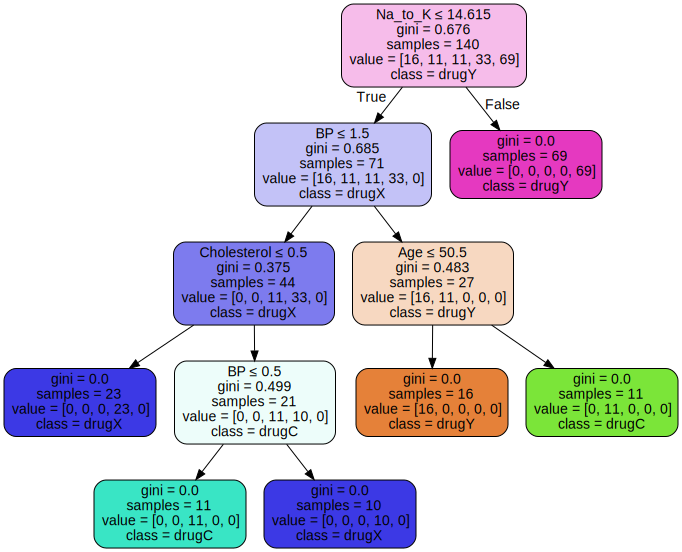

In [60]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X.columns,class_names=df.Drug,filled=True, rounded=True, special_characters=True)
valgTre = graphviz.Source(dot_data) 
valgTre

##### Render the Decision tree in pdf

In [62]:
valgTre.render('drug')

'drug.pdf'

In [64]:
y_pred = model.predict(X_test)
y_pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

##### Check the Accuracy

In [91]:
print('Classification Report:\n', classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))      

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60


Accuracy: 0.9833
Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


### Final Prediction
Suppose there is a new patient named Mr. Sayem who is 30 years old, male sex (1), normal blood pressure (1), normal cholesterol (0) and the amount of sodium-potassium is 10 units. Which medicine will be applicable for this patient?

In [94]:
new_observation = [[30, 1, 1, 0, 10]]
model.predict(new_observation)

array(['drugX'], dtype=object)

#### According to the prediction of the model, the patient has to be prescribed  "drugx"